# Chromosome Summary

The goal of this notebook is to import the SNP2K graph and summarize where nodes and triples can be anchored to the human genome.

Authors: Charles Tapley Hoyt and Reagon Karki

In [55]:
import getpass
import itertools as itt
import os
import re
import sys
import time
from collections import defaultdict
from random import choice

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

import bio2bel_hgnc
import pybel
import pybel.dsl
import pybel.struct
import pybel_jupyter
import snp2k
from bio2bel_hgnc.models import HumanGene
from pybel_tools.assembler import ideogram

In [2]:
%matplotlib inline

In [3]:
print(sys.version)

3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


In [4]:
print(time.asctime())

Fri Sep 20 08:59:57 2019


In [5]:
print(getpass.getuser())

crobinson


In [6]:
print(pybel.get_version())

0.13.2


# Get Data

Instantiate the chromosome mapper

In [58]:
%%time
chromosome_mapper = snp2k.ChromosomeMapper()

CPU times: user 482 ms, sys: 129 ms, total: 611 ms
Wall time: 3.37 s


In [8]:
dir(chromosome_mapper)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_triples_iter',
 '_iter_id_name_loci',
 'chromosome_to_edge_keys',
 'cross_chromosome_to_edge_keys',
 'entrez_id_to_hgnc_id',
 'get_chromosome_count',
 'get_cross_chromosome_count',
 'get_cross_chromosome_count_df',
 'get_node_chromosomes',
 'get_triple_df',
 'hgnc_id_to_chromosome',
 'hgnc_id_to_positions',
 'hgnc_symbol_to_chromosome',
 'hgnc_symbol_to_positions',
 'human_refseq_df',
 'update_chromosome_map']

Get the SNP2K graph

In [52]:
%%time
graph = snp2k.get_graph()

CPU times: user 17.4 s, sys: 376 ms, total: 17.8 s
Wall time: 17.8 s


In [10]:
%%time
graph_summary = graph.summary_str()

CPU times: user 26.3 s, sys: 4.33 ms, total: 26.3 s
Wall time: 26.3 s


In [11]:
print(graph_summary)

Graph from: NeuroMMSig Ontology, KEGG Pathway Definitions, Reactome Pathway Definitions, ADEPTUS, HIPPIE, GWAS Catalog, WikiPathways Associations v0.0.1
Number of Nodes: 537377
Number of Edges: 1041046
Number of Citations: 3546
Number of Authors: 0
Network Density: 3.61E-06
Number of Components: 1251
Number of Warnings: 0


## Summarize

In [12]:
pybel.struct.summary.count_functions(graph)

Counter({'BiologicalProcess': 3267,
         'Pathology': 3020,
         'Gene': 131725,
         'Abundance': 80,
         'Protein': 30380,
         'RNA': 31218,
         'Complex': 337687})

In [13]:
pybel.struct.count_namespaces(graph)

Counter({'neurommsig': 161,
         'efo': 3005,
         'hgnc': 92330,
         'dbsnp': 100437,
         'nift': 80,
         'kegg': 335,
         'uniprot': 552,
         'reactome': 2246,
         'doid': 15,
         'ncbigene': 4,
         'wikipathways': 525})

# Chromosome Mapping

In [14]:
ideogram.to_jupyter(graph)

TemplateSyntaxError: expected token 'end of print statement', got 'class'

Count the number of triples for each chromosome

In [40]:
chromosome_mapper.update_chromosome_map(graph)

Mapping edges: 100%|██████████| 1041046/1041046 [00:12<00:00, 83384.89it/s] 


## Single Chromosome

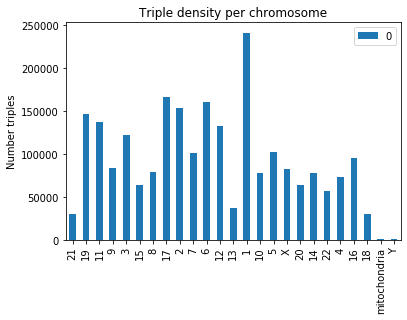

In [20]:
chromosome_count = chromosome_mapper.get_chromosome_count()

pd.DataFrame.from_dict(
    chromosome_count,
    orient='index',
).plot(kind='bar')
plt.title('Triple density per chromosome')
plt.ylabel('Number triples')
plt.show()

## Chromosome Pairs

In [17]:
cross_chromosome_count_df = chromosome_mapper.get_cross_chromosome_count_df()

# Log 10 transform everything
for column in cross_chromosome_count_df.columns:
    cross_chromosome_count_df[column] = np.log10(cross_chromosome_count_df[column] + 1)

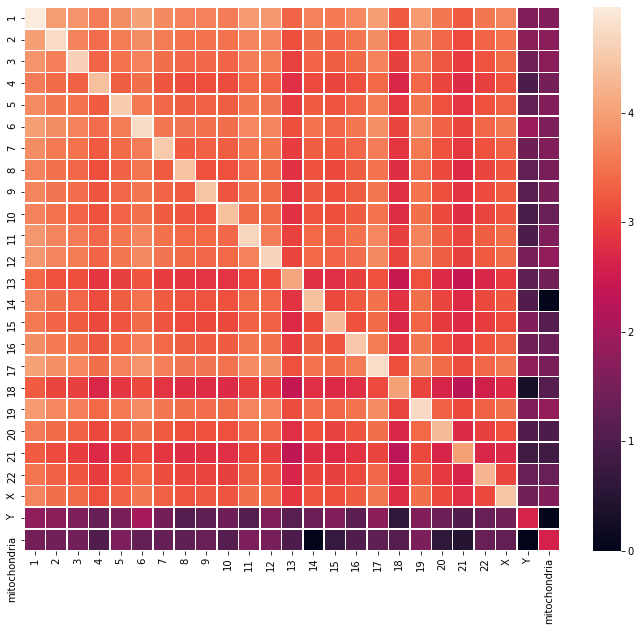

In [18]:
plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(cross_chromosome_count_df, linewidth=0.5)
plt.show()

## Triples Dataframe

In [59]:
triple_df = chromosome_mapper.get_triple_df()

In [60]:
triple_df.head(5)

,BEL,Subject HGNC ID,Subject HGNC Symbol,Subject chromosome,Subject locus,Object HGNC ID,Object HGNC Symbol,Object chromosome,Object locus


In [87]:
my_nodes = [node for node in list(graph.nodes()) if isinstance(node, pybel.dsl.CentralDogma)]
for node in my_nodes:
    if node.namespace.lower() == 'hgnc':
        try:
            print('ok', chromosome_mapper.hgnc_id_to_positions[str(node.identifier)])
            #rint('osome_mapper.hgnc_id_to_positions[str(node.identifier)])
        except KeyError:
            print(str(node.identifier))

620
597
598
580
578
2529
9067
579
581
2527
933
8032
1775
1776
1774
1787
1784
1785
1582
12362
1779
1581
1773
1788
1789
1790
1722
1780
2698
1653
6529
11641
11935
7776
17635
5351
17087
8760
11277
11278
16253
6893
9308
17655
11766
11768
11769
11771
17075
18157
11773
11772
11850
11848
11849
15631
17967
7562
6112
12036
6122
6118
3573
19383
1628
11920
11892
10718
12801
30765
18152
11916
12030
11910
11936
29255
12611
12627
621
12508
7732
17004
16804
791
786
3255
3449
20738
5238
11845
13724
17052
12680
12681
12682
6307
9403
9399
9395
9407
9410
9402
8004
9612
4187
2605
12679
2606
2602
10477
9606
603
600
602
6685
24525
11653
10937
10938
10939
11041
30521
16266
583
2553
3084
9299
9302
8995
4043
9850
10899
16913
903
2514
4617
1144
2453
2452
2456
2451
2454
1527
904
108
983
15963
1957
1959
1958
1963
1961
1964
1965
14079
1960
1967
13800
1956
1962
1912
11998
12628
9957
2661
2355
2357
216
195
193
190
201
197
221
188
220
217
224
13201
17111
7881
24565
607
609
10658
10659
10661
2979
263
11205
10540
6686
7

25503
16645
10768
5031
5241
10770
11151
5239
30855
15879
30859
15860
19824
16944
11155
15762
24941
25073
23156
17042
18676
9089
16461
25930
25031
11157
30240
8647
16696
9258
14651
10791
10765
23020
975
16930
5046
15446
16900
17351
2738
51830
10771
17340
25512
29629
2749
11153
16939
26859
10767
10769
29295
16988
10538
28332
17896
1743
2746
17349
16713
18681
42969
16463
20071
9330
30551
17886
15630
26433
11162
27067
9533
9532
9556
9557
9531
9536
5438
9530
9564
9571
9534
9535
20330
9545
9554
9540
9539
31963
20635
9565
9566
22985
9537
9541
9561
15759
16889
9560
9570
9542
9559
9544
9543
10845
9569
9568
9558
9549
9551
9548
9547
9538
9552
9546
9553
23400
17718
16993
14598
21082
26317
11846
11299
28962
11304
26212
24085
17702
11301
11302
18276
5238
11300
8526
23401
11303
18277
11307
1663
2690
10479
29393
10478
9235
12517
10995
9236
10477
12468
640
3562
3561
9232
3560
3557
9076
9093
17288
3556
10996
248
10998
6040
7155
610
600
8133
7966
601
14565
33196
11000
3559
13633
3555
16039
9184
272
17889

1337
28086
11110
17427
20213
18828
25716
1421
18040
28990
160
14000
20225
11108
11107
29079
16971
11109
11100
33848
28816
26970
20116
29918
11098
24990
11105
28625
11104
28216
18025
28074
24124
21868
11106
15527
21034
26801
20815
11103
11444
11132
10945
10944
10941
11048
11049
11042
17282
11054
2309
10939
10940
11050
7641
27652
9777
12566
11044
16703
20151
11056
23150
11045
10936
11046
10934
11509
24330
16704
11051
8016
2310
10935
23149
11018
6813
17020
6113
8033
679
13388
6906
678
30417
680
13068
9348
29605
17381
29508
21398
21683
3553
28923
1165
15474
2905
18044
13447
14294
14295
13448
14025
6260
6258
6297
6296
6298
6299
6265
6263
24005
20244
620
5298
5297
24004
6238
24003
6291
9063
4812
18070
13818
17938
10585
4395
16973
8191
8204
8186
8179
8284
13963
7655
13966
13972
15301
15152
15139
15153
15162
15171
15087
15180
15195
15079
14729
15005
14853
14772
31275
14836
14844
14825
14707
14726
31940
14702
15008
29166
14856
27538
15007
14703
15431
8283
15381
15424
8282
14708
15011
14992
1476

29872
33751
16919
18021
19254
1109
11498
16038
18304
19184
15703
2482
3955
13531
11697
15716
31928
9862
24641
8510
24702
8743
17621
8050
8051
14596
18011
15956
23091
11038
752
12505
12790
13919
10819
2570
1471
8515
21690
19305
8744
19089
19306
19156
20303
29437
28868
28867
11513
28358
16354
31358
18827
4330
17160
9775
4428
18757
19983
21965
28212
692
20335
19844
15448
4427
9770
25608
662
4424
16521
1172
16896
24340
18293
17686
16162
11870
16858
10518
23218
19095
18652
6915
14077
16505
24966
3033
5392
9975
22950
13542
24271
25422
16512
17105
13358
16181
22222
21625
13549
17992
25519
13540
14543
24215
14542
31401
31789
13533
14540
20679
14544
13534
13543
2021
25143
3051
13535
13476
30213
29103
13541
12703
17106
28664
23837
10601
2025
2022
10931
2023
3706
2017
31677
21652
7146
14004
2019
2026
13554
13357
26582
24244
19420
27337
29329
13211
19966
19082
13877
11762
6115
15987
4886
23095
24682
29572
615
28859
16135
1976
33714
18685
2418
14411
23046
23139
1717
16263
16943
17408
11247
4894
292

COPS6
COPS7A
WASF2
COPS8
TLR2
TLR4
TNK2
CASP10
PIP4K2B
RIPK1
RIPK2
MADD
BAG4
PSMD2
ERAP1
TRPC4AP
RIPK3
SPRY1
TNFRSF1B
LAX1
TRAIP
HIVEP3
SYNJ1
NCKIPSD
MAP3K8
MAP3K14
TH
BCAS2
SYNJ2
VEGFD
VEGFC
RUSC1
SHC3
SH2B1
KIDINS220
BEX3
U2AF1
ZRSR2
MTA3
NXF1
RP9
SF3A3
DDX6
SF1
LY6G6F
TCERG1
UQCRC1
UQCRC2
KHDRBS2
UCHL1
RPS27A
COL17A1
MED28
GGA3
MAST2
GGA1
SHKBP1
ST14
SCGB1A1
CUBN
CSE1L
ARVCF
CA9
ACTR3
CBLL1
PHC2
ATP6V1B1
VCAM1
MSN
CCL17
MEGF6
CCL22
ITGAD
GPC1
SEMA3F
NRP1
NRP2
MEGF8
ADAMTS1
RAMP1
RAMP2
RAMP3
AVPR1B
AUP1
ELF5
ITGA2
ITGA4
LPXN
ADAM28
EED
LGALS8
AGTPBP1
RELN
SLC18A2
ARMCX2
HAP1
CTNNA1
ERCC5
PKP1
DEFB1
CRMP1
PPL
BFSP1
SH3GL3
HSPA2
DNM1L
MICAL1
UTP14A
ATXN3
UPP1
PLA2G4A
OSBP2
PCBP1
UPP2
CEP126
ASGR1
ASGR2
CORO2B
KLF1
DHFR
ETV6
AMPH
LACRT
AZGP1
PLP1
PAK4
CCN1
EDIL3
BAK1
VBP1
ELOB
ELOC
RNF139
CCT3
HIF1AN
JADE1
USP33
ZNF197
HIF3A
VWF
CDK5
CDCA3
BRSK1
LIG3
NEIL1
RPL7
ZNF7
ZNF8
ZNF174
ZNF24
ZNF10
ZNF74
MZF1
SCAND1
ZNF20
ACACA
NARS1
CYP17A1
C1R
ACLY
DPYS
SI
FBLN1
F7
EFEMP1
SERPINA10
FANCE
FANCG

AURKC
CLPS
PNLIPRP2
CYLD
ERG28
PRSS23
MAGEA11
IST1
UBA5
NINL
APLP1
PNP
ANXA3
UBR1
KCTD17
CCDC85B
ZBTB43
PNO1
ATP6V1G1
TGFBI
C16orf74
IQCN
NECAB2
CCND2
CERT1
ANTXR2
ZC3H11A
FRMD6
ASB9
CKB
SERP2
USH2A
VTA1
MAF1
PRR13
PCBD1
WDYHV1
ATP6V0D1
NUDT18
GADD45A
HSD17B14
UBL7
ERCC1
EGR2
PAEP
LAMA4
CCL18
TMPRSS3
SDHAF2
PAPSS1
LAMTOR5
RNF10
ZNF804A
MRPL42
TRDMT1
RSRC1
RPS14
ENO2
HK1
C19orf57
SLC1A1
NDUFV1
TMSB4Y
VPS72
ZNF165
MYO1F
SALL2
TULP2
CPSF6
TRPV5
HERPUD1
SUV39H2
FAM131C
SSBP2
RNF183
LILRA3
MNS1
KRR1
RALYL
CXADR
NDUFB1
PGLS
C11orf16
MAPK1IP1L
TPGS2
CUEDC2
DNAJB3
SLC22A24
MRPS18B
NSUN4
RASL11B
GPBP1L1
TSPAN3
WDR37
ELAVL3
DMRTB1
NLE1
MYL6
NTNG2
PRTFDC1
ZNF276
RPL31
GOLM1
SLC25A6
RPL8
PNLIP
FOSL1
GFAP
POM121
LIPF
RIBC2
CEP76
KIAA0408
GLUL
PLEKHF2
ARL15
GPD1
HOXA1
RFX6
CHIC2
TRAPPC6A
HOXA9
KRT15
HOXB9
MEA1
CEP72
IFIT2
IFIT3
ITPKB
IL11
IFIT1
KRT6B
FAM107A
DEPP1
DGCR6L
KRT6A
KRT81
USP2
CCDC120
TXNDC11
RCOR3
CCDC185
C1orf216
KIAA1217
KRT20
ARC
SGF29
TCHP
TEKT4
NOC4L
AMOTL2
WAC
KRT17
WASHC3
NME7
MLL

KRT23
NLRX1
ZFYVE28
FBLL1
NGRN
XYLT1
MYNN
UTP4
FAM83H
GYS2
NT5DC3
KIF26B
RASAL3
LIMCH1
RASSF6
ZNF676
IQCE
ZNF175
MED12L
KLHL11
CYB5B
MIER3
ACER3
NSD3
PROM1
DDX51
ATP2C2
ORAI3
ZNF600
TMEM63A
MRPS2
HOXB5
FAM90A17P
TMEM131L
MFGE8
ADGRB3
HSD17B3
QPCT
FAM91A1
ZBTB40
UNC80
TEDC1
HLA-H
NCKAP5L
PTRH1
COX15
ARMC1
SPOUT1
ZBTB8OS
NPIPA1
RBM6
LRCH1
ZNF766
ZBTB37
ABCC3
TECR
FLG2
PABPC1L
NDUFAF2
FAM135A
U2AF1L4
TMEM131
SMARCAD1
TCEAL3
WDR41
IQSEC1
GAREM1
TBC1D9B
ADAMTS20
UTP15
SMYD4
MRPS33
CASS4
SLC25A27
TCP11
L3MBTL3
MICALL2
PPIP5K2
DNAJC12
CLPTM1L
TMEM173
XKRX
CCDC149
TEX2
ZBTB1
FAM50A
ZNF418
ZNF703
SAMD9L
SLC27A4
AAK1
RBM47
KNDC1
MZT2B
DNAJA4
MUC12
NUDT6
DCUN1D4
ZNF773
TCTEX1D2
NBPF8
RMC1
C2orf16
CSPP1
RABGAP1L
C2orf73
STK33
CCDC25
EIF4E3
TMEM87A
ARSB
FASTKD1
CYP2U1
BCO1
DNAH2
TUBAL3
DENND6B
ZNF233
CCDC97
TTC9C
EDRF1
VMAC
RAB39A
ATP2C1
HBS1L
SPEG
EMILIN3
UST
TTC21B
SBNO2
PADI2
COX11
PDSS2
ATP6V1B2
MRPS18A
MRPL3
SLC25A18
OXA1L
ISCA1
MRPL46
DDX28
INTS12
CPT2
MRPL51
HM13
TGIF2LY
MRPL50
LENG9
HEMGN
C

TBC1D26
MOV10L1
BICC1
TDRD15
RPSAP8
MROH6
CLVS2
RPLP2P3
PHLDA2
CCDC71L
SGMS2
RTL4
ZNF469
BTBD11
PNPLA8
TCERG1L
KRTAP9-1
USP17L5
MPV17L2
IPMK
RPL12P6
LGR5
GLOD5
PRSS12
FAM111A
VDAC1P1
TRAM1L1
LINC00322
API5P1
TIGD2
RAD21L1
NOVA2
SUMO2P1
SLCO4A1
ASXL3
REEP2
RPS10P7
IAH1
PLEKHA3
MBOAT2
DRC1
C8orf37
SULT1C3
LRRN3
FBXW12
ANO10
ZCWPW1
SH3TC1
METTL5
BEND4
LEKR1
NKX6-1
RPSAP19
MICU3
PLPP6
TMEM208
RPLP0P3
GLRA4
LRRC52
LRRC58
CPNE9
ALLC
XKR4
PUS10
CSMD3
DNAJC24
PCDHB3
SLC17A6
RPS10P11
RPS10P22
PKD1L1
ZDHHC20
ISLR2
ZNF608
MFSD11
TMEM243
ARAP2
VPS9D1
LYSMD3
OTUD3
ZDHHC11
AK7
KRTAP9-9
TATDN3
DDX60L
ABCB9
CISD3
UBE2MP1
PTMAP12
NEPNP
SFT2D2
ABHD14B
LINC00528
CMTR2
GCNT2P1
DNAH8
MYH15
ZNF257
SLC22A17
ZNF845
RPL12P14
DCDC1
ITPRIPL2
GANC
ZNF767P
ZFR2
RPS19P3
KRTAP9-8
RPS10P4
TPPP3
CIAPIN1P
C15orf54
SLC13A2
GOLGA6A
CHI3L2
ARHGEF33
ATP10A
CLDND2
TMEM138
TYW3
TVP23B
SUPT16HP1
SUMO1P3
RPL12P35
UPB1
C3orf67
H2BC19P
RPLP0P2
CFAP44
TBC1D12
ZBED6
SLC2A9
PRSS56
RNA5S7
ERAP2
LPIN3
KHNYN
NLRP14
TBC1D30
TCTE1
CCDC1

4029
2000
28040
1458
33882
3188
8908
21297
24335
6818
7582
17223
11108
12010
19235
6367
17646
18697
21559
563
25083
11329
1008
9221
3173
6359
11944
11949
24086
1080
6730
13032
939
20155
23696
15593
14671
5211
24254
22949
10597
28299
26005
21091
10297
9164
8845
9024
6565
1817
25618
846
4819
28149
9099
483
30293
2370
12762
8828
3498
3262
10682
13238
16063
13108
13060
15772
17500
10530
8091
16372
12845
14065
5414
712
6769
6721
18514
1568
30793
6846
24148
1051
19910
18646
9025
30201
462
26101
6568
833
10867
24170
20999
8048
16395
404
29435
11858
24861
16944
26044
942
403
11891
1424
7154
723
12994
2294
1991
16790
684
18348
6354
8547
2597
23113
4262
3071
1763
7158
17184
23925
17933
21208
25072
3388
11760
2727
3179
26099
30242
13020
26040
11830
11159
8972
10776
8000
25571
25386
10999
17
581
1911
18006
43
9399
21159
2186
16879
15520
12401
26258
8986
12739
23085
10571
17637
12347
14454
8860
3249
16996
3942
14198
11957
16276
3119
14011
2665
14582
120
12585
9608
24671
1101
2909
6638
9007
8830
179

28337
3449
16499
23304
19902
17921
25601
20596
30396
14355
5228
10704
30167
25238
26783
14236
24138
15456
6632
9437
16787
12666
13744
15897
12520
16235
15912
17943
10535
10068
11323
12510
8548
11325
1479
24173
11324
16986
9043
15455
51901
16695
7106
14889
21073
2388
16994
2389
12508
15877
5253
4606
1237
5258
25222
24844
5270
10705
12509
10534
18261
10703
25035
12028
17041
17052
16931
463
6631
13585
937
1476
938
9356
14891
14884
23197
30550
19004
10908
1693
20376
560
568
7897
16841
6924
573
17079
23026
6752
566
16064
24102
567
2530
28486
28875
5467
575
572
554
2073
17842
33131
11186
2013
10907
559
29612
2074
1665
574
569
10933
2090
2542
13395
18971
2535
2091
17378
2538
2092
13667
17224
2721
23368
9760
4897
17677
11172
28439
11175
25082
11174
9764
24634
24287
1529
28984
20954
10834
18178
9507
23416
20373
8740
30599
1528
9781
20759
30267
19092
654
28122
6547
6323
658
25153
25754
4272
24205
15469
6325
4962
4964
30265
15852
16469
10830
10831
23414
24845
28977
19093
3243
10895
3185
4931
2453

15072
4482
15232
8486
17975
23992
14770
26176
8258
4487
15246
15311
4535
8370
14788
13968
32370
28580
14994
15510
8196
23711
15047
15572
15161
32486
4480
17867
13937
29602
24822
3301
25700
719
20415
3300
27717
25199
717
30543
28662
3004
2869
721
24270
3003
26979
32488
9460
32521
25239
26286
4283
4288
4287
4286
4279
4281
23296
19155
19147
4285
4277
4278
16690
17494
4284
26400
25044
7547
18444
21339
20122
18700
11569
1350
2847
12380
25929
11712
7201
30447
9438
17644
27050
23440
25406
14879
29241
7963
15905
7974
12969
24821
18559
13561
3474
13652
23820
18022
17562
20872
13101
12922
951
24224
3471
25592
16657
24517
13148
7973
17321
25205
30941
20875
20174
13450
22228
26138
26987
3316
30860
18249
25883
1733
17363
13502
12875
32469
13128
28028
21036
4668
7679
13073
9796
7968
25843
26232
1886
6164
9688
37138
7972
21958
32033
13141
30899
21637
20345
13168
24639
23384
25821
25048
13146
9704
37134
33204
32460
30255
24484
25372
18222
3031
26049
17298
16197
25791
23716
7975
25775
24432
4808
25067


OPN1MW2
OPN1LW
C1QTNF1
CASP2
SHH
VIPR2
ZFPM2
FGD1
GRPR
HIVEP1
PPM1G
LMAN1
PHYH
BPI
ALDOC
FGF23
PHEX
HPRT1
CD84
SLAMF7
IL15
SLC4A1
IL15RA
IL3RA
CA4
FMR1
FXR1
NUFIP1
FXR2
CYFIP1
CYFIP2
NUFIP2
SPN
ASS1
TIMM44
PRPF6
NUDT14
PBK
STK16
PIGA
PIGH
DPM2
PGK1
PRPS1
PRPSAP1
PRPS2
PHKA1
CDK2AP1
RBMS1
PDK1
SLC4A1AP
PDK3
PDK4
ZMYM2
RP2
ARL3
BLOC1S6
HTR2C
LIN7C
SAT1
UBE2D3
SOX3
PAX6
SYN2
SYN3
CAMK1
PPIA
TAF2
TAF7
TAF15
SLC16A1
TAF10
TAF12
ASF1A
ASF1B
TAF8
SLC16A3
CD48
NR2C2
NR2C1
RAC3
FOXA1
RNF4
SVIL
HIPK3
CDC37
RNF14
PAK6
CD244
SRY
PNRC1
ETV5
CDK5R1
CD40
MS4A1
RAD54L2
NISCH
SART3
ZMIZ1
EFCAB6
TFE3
TFEB
TFEC
UBA1
TRA2B
RBMY1A1
KHDRBS3
UTY
TLE2
BPY2B
BPY2C
BPY2
EIF1AY
COX5A
MT-CO1
MT-CO2
CACNB2
REM1
RFX5
RFXANK
RFX3
NFIB
NFIC
INSM1
SAP30
YAF2
RYBP
ATF6
SS18
ACTL6B
MXI1
SIN3B
LBR
FNBP4
KIF5C
SCN4A
CDK5R2
ABCA1
PTPRN
MAST1
SPEN
TMBIM6
RTN1
APAF1
BNIP1
BNIP3
BCL3
BIK
HRK
CFLAR
BCL2L11
BECN1
FKBP8
AVEN
BCL2L14
NFKB1
ANTXR1
BCL2L10
BNIP3L
SPNS1
PMAIP1
MOAP1
NFKB2
BAX
SH3GLB1
MAP2K7
KIF3A
SH3RF1
ESM1
ICAM5
V

MMAA
PPP2R2B
ATXN7L3
GREM1
MYO18B
RCAN3
ATXN10
MVD
CDC37L1
SLC3A2
COTL1
NEDD1
EMB
GATA5
HOXB3
HOXB4
HOXD4
IRF1
GPBP1
MN1
CNP
ZBTB2
ZNF639
MYBL1
HLF
HOXA11
HOXD10
NFIA
NPAT
POU2F3
DOK6
ENO3
IL32
CORO1B
NEXN
C1orf61
MS4A3
ACTR10
MAP4
CCNF
GAS7
VWA1
HAGH
GGTLC1
OLFML3
PKLR
IGLL1
MAEA
ALDOA
DNAJB4
ZSCAN21
TASP1
ACO2
SUMO4
CCT6A
TXNL1
PHGDH
IDH1
STOML2
GMPS
ZPR1
MRPS22
TUBA1C
PLS3
SCG2
XIRP1
PRDM16
IWS1
TRIM22
CARS1
PPM1E
PLPP3
NACC1
COX4I1
COX5B
MPP4
ADCY8
FAM162A
FGD4
AHSA1
GBP1
PROCA1
ABCB11
ABCB4
IL10RB
IL10RA
COPG1
SACS
AREG
SEPTIN11
IFNL3
NGLY1
DLC1
TSPY1
PIM3
ICAM3
NEB
PARP3
ACTL7A
PLA2G15
HK3
THRSP
ADI1
SHOX
MOB1A
MT-CO3
BRI3
USP9Y
PCSK1
PCSK2
SLC12A6
SLC12A1
RELT
SCYL3
TMEM8B
ITIH4
MRPS26
SLC22A11
CRELD2
NUP42
YIF1A
YIPF5
HOXA13
HOXD13
HOXC13
HOXB8
HOXA2
MEIS2
MEIS3
GAA
MGAM
TRPV2
TFPI
DUSP9
QDPR
PAH
UBE4A
CFI
MMP20
DUOX2
DUOX1
MMP19
TPO
CYC1
PAPPA2
RAB18
CYB5R1
GALNT1
SLC1A5
ERVW-1
SLC1A4
NPY4R
NPY
PPY
PPP1R1A
FAU
DENND10P1
ST3GAL3
TMEM62
ALB
C11orf58
AFP
LRPAP1
TCF21
TOE1
ATP6AP1

THAP4
CYB561
REG1B
MBOAT7
DNAJC28
TCEAL7
SNX32
NAP1L3
PDE8B
ACO1
PRR16
SRSF4
OAS3
MTCL1
PTBP3
CDK13
DCAF7
N6AMT1
GPANK1
SALL3
TMEM234
METTL21A
SH3D21
DCAF10
RASGEF1A
PASD1
MARF1
RDH10
TRAPPC11
HGH1
ASIC3
ANKRD46
RAP2C
C5orf51
NSRP1
TMEM97
ZNF827
PAG1
ZNF529
RPLP0P6
WDFY1
RNF212
TMEM65
PDE7B
KNSTRN
PRSS50
CLIC2
HLA-DRB5
ADORA3
UNC93B1
MZB1
COLGALT1
TADA1
FAM219A
MICOS10
CCDC124
OR51G1
RPL13P12
ARRDC2
MSRB2
ATP23
TSPAN13
FNDC3A
ZNF516
DCAF12
PNISR
LTN1
PRXL2B
KMT5C
MMS22L
C3orf33
IGF1
MPV17L
H4C7
NDRG3
COA7
DUSP28
MSL3P1
DOLPP1
PHTF2
SLC39A10
NIPAL3
FAM219B
STN1
PLD6
ARHGAP35
CGAS
MRPL20-AS1
CDHR1
JHY
SFR1
SRSF8
ZC3H12C
SCAF8
SZRD1
ZNF554
PRRC2B
GLCE
RPF2
IL37
HACD2
FAN1
SCAF11
GRAMD2B
NTNG1
TTI2
H2AB1
XXYLT1
GLIPR2
C4orf46
ASIC2
ASIC1
CDK16
SFSWAP
TPI1P1
TRAPPC8
ANXA2R
DONSON
CENPP
METTL18
GNAT2
MOB3A
RPL29P30
TRIT1
SRD5A1
KIF4B
RPL21P16
FARP1
SLC25A15
GON4L
MBNL2
EPHX1
SLC7A1
TSPAN9
C1QL1
MTURN
KIAA1958
SLC19A2
DCSTAMP
PHETA2
TMED4
SCML1
TSPAN31
MSMO1
MTCP1
ZNF800
FAM207A
PM20D2
RHNO1


17307
8623
20255
5123
12869
10930
20686
25200
43476
20365
20320
41834
28842
2383
41652
11193
13907
24323
7552
35259
4778
11598
3254
7643
26495
24534
31515
31556
31585
31527
1850
4539
13300
20974
13548
18582
15413
3230
19893
19991
41538
13301
17416
33527
15930
44498
30555
38299
1917
38942
4734
50271
4741
4516
20973
20822
21390
29659
50240
26686
7171
11631
14250
14357
14366
14249
2633
41647
10784
30477
24472
21081
9179
292
9165
5130
3496
19087
5129
5249
17007
17209
14082
9797
29658
32207
11515
25635
13875
4718
886
4730
16974
38928
38359
38207
31774
32859
38916
41878
9064
25906
38304
38251
35290
38899
41777
38295
33680
17860
11411
50049
18179
20593
14584
25132
17866
12446
14583
15972
18
21464
22948
24204
13578
17447
17597
13615
1703
14574
29806
19972
24308
10492
21231
31
29013
32326
23799
28703
7824
2478
14272
50037
24942
2442
1694
50125
38290
19888
29422
50022
26233
30231
17085
28364
28052
15891
25820
11694
26090
13731
13387
26181
12597
21484
21146
20423
2981
1799
15886
24817
10295
16473

10719
7499
7498
7497
7502
7643
1493
7494
7478
24249
12840
7475
7495
7496
7477
7481
7479
30740
17697
26274
7487
24728
7486
4816
5330
6512
25695
25068
4162
7488
12730
20
21406
17800
7493
21642
30563
21022
7489
10537
7492
9870
3592
2678
9751
7501
7500
7491
7490
2632
2608
390
2624
3773
3769
3770
12014
1863
1864
3574
1492
3465
25090
21350
11283
11765
10840
8799
10437
7029
7998
905
4168
16743
3430
3431
18181
33179
29869
7672
3796
3115
7670
3059
3114
23393
9381
6973
32565
3793
5960
3791
11990
1100
3433
7127
7326
11016
14640
68
14638
35
34
49
36
41
50
66
39
30
12825
25553
14264
29926
23984
17689
19440
29540
25517
10168
19909
24286
30696
11654
30129
24274
20220
14497
24250
10665
2459
8070
14378
30329
18119
11587
25652
14377
34366
16912
12836
34365
10031
34364
7470
34367
28945
15911
7471
34369
34368
34370
19949
21535
34372
34373
34371
17687
34375
34376
34374
34362
34363
34377
34378
25758
25725
18656
1983
24661
33189
33190
23505
8072
8073
33191
8075
25789
18151
30654
18476
16633
14484
10386
10383

37175
44440
44446
20078
20066
12617
20351
37181
24105
21153
44449
29401
44448
44450
20485
18224
23077
44445
44443
44439
28853
20445
12625
12623
12612
29038
20063
6036
44453
23480
28975
34434
13485
30897
12626
37182
37176
19667
20064
20076
20068
44438
18911
18891
16926
16928
6663
18925
20411
16612
29461
29459
34211
18936
1502
6462
18942
7976
18910
16777
18928
33902
7566
28929
23734
24260
23601
18914
18915
18912
18904
25944
19200
19338
18906
18945
18944
33898
34003
16778
18905
16779
18907
18932
7612
28845
18941
18710
23604
6361
20525
19970
24628
3748
1802
32687
26780
18933
3814
22970
1539
20521
6440
23444
2372
28932
21109
34216
28928
18927
23596
6461
6445
23600
18940
10524
11634
13399
6458
18937
28927
15924
12997
6459
20533
18947
20530
18946
18931
22966
16610
2376
23606
22967
22969
27056
18924
15464
23605
20531
22972
18943
18923
3126
17894
29466
29465
29467
11477
18938
6360
6187
23602
29464
23154
22971
23455
24431
16771
7985
16611
29469
32951
16773
18916
189
21307
31824
28930
32046
18939

S100A7
MAP3K12
RAVER1
KPNA4
PLCD1
PPHLN1
PDCD7
CNTNAP2
JAG1
KAT2A
JAG2
LFNG
MFNG
DTX1
ITCH
MAML2
MAML3
DTX2
WDR12
SMC3
RAB3GAP2
TBC1D25
SCOC
EXOSC8
MAPKAPK2
EXOSC6
CCNB1
TPBG
TNNT1
TMOD2
CTNNB1
ACAT2
SERPINF1
PIK3C2B
TNNI1
TNNI2
TNNC1
TNNT3
TNNC2
PKD2L1
TPH1
SIRT1
AICDA
RHEB
TSC1
NEK1
LAMB1
USP8
MAP1A
MAP1LC3A
GRM7
TP63
PFDN4
TBCE
RTN4
LGALS2
NCALD
HSPH1
TAOK2
SNCAIP
NOS2
SYT6
MTA1
CRIPT
SYT9
TTBK1
ARL8B
MAP6
MRGBP
RNF19A
CENPJ
TUBGCP3
TM4SF1
SDCBP2
CHUK
TAX1BP1
LDB3
TNIP2
EPHA5
EPHA4
EPHA6
UBE2A
BCL2L1
NEU3
PTGS2
HNF4A
ELL
HSPA9
CSNK1D
TSG101
CCNG1
MERTK
PTEN
ZNF148
VRK1
STK11
UBE2K
PLK3
CDC14A
CDC14B
MED17
PTTG1
EFEMP2
BRF1
TAF1B
TAF1C
STK4
WWOX
SHISA5
CUL9
GNL3
TAF9B
PIAS4
COPS3
RCHY1
PRIM1
TP53INP1
ING4
COPS4
GPS2
TP53RK
GPS1
PLAGL1
SETD7
MDC1
ING5
BANP
COPS6
COPS7A
WASF2
COPS8
TLR2
TLR4
TNK2
CASP10
PIP4K2B
RIPK1
RIPK2
MADD
BAG4
PSMD2
ERAP1
TRPC4AP
RIPK3
SPRY1
TNFRSF1B
LAX1
TRAIP
HIVEP3
SYNJ1
NCKIPSD
MAP3K8
MAP3K14
TH
BCAS2
SYNJ2
VEGFD
VEGFC
RUSC1
SHC3
SH2B1
KIDINS220
BEX3
U2AF1
ZR

DCPS
SESN2
SESN1
CLEC4M
GALNT13
USP21
FERMT3
NUP160
RPRD2
ENTR1
FTH1
WNT1
AKT2
GART
ICAM1
KMT5A
PRC1
SPDYA
CXCL10
QRICH1
UCK2
PPCS
ANKHD1-EIF4EBP3
ANKHD1
FCER2
VPS25
CHMP1A
CENPB
UROS
UAP1
ASL
HBZ
BNC2
DEFA1
DEFA3
DEFA1B
IL12B
IL12A
CRABP2
HSD17B1
CNTF
IL5
HINT1
GYPA
CCL7
APOH
TPSB2
TPSAB1
GSTT2
GSTT2B
ICAM2
LGALS7
LGALS7B
BMI1
KIR2DL2
GSTA4
MIF
NQO2
S100A3
PRSS3
BCAS1
LIMD1
CBS
BCL2L12
PMS2
HEXB
IL17F
HGF
ULBP3
NMNAT1
AARS1
WARS1
S100A9
GGH
PSPH
SH3BGR
UFSP2
NFE2L1
GPT
TINAGL1
ECHS1
RRP12
DAPP1
KLK6
ILF3
FUS
KAT5
CENPC
DLEU1
IK
LMNA
RNF31
ARIH2
LSM8
PGD
CENPE
CRELD1
OGFOD2
GSTO1
HNRNPH3
CCDC106
TELO2
C1orf174
NDUFA4L2
FAM135B
ANTKMT
RFLNB
NAP1L5
CP
NDUFV2
PDCD5
PLEKHA4
EDNRA
IGFBP5
ITGA5
HBB
FBLN2
NRG1
RPGR
MYBPC1
FPR2
IPCEF1
RPGRIP1
HTN3
B4GALT1
SLC9A7
ABAT
SCAMP5
YY1AP1
SLC25A10
IFT88
RFX2
GSN
COL9A1
COMP
COL6A1
GCK
NF1
UGT2B7
CYP3A4
MGST1
MVK
IDUA
HOXA5
WNT2
DIO1
CCKAR
GLRB
AMELX
GSTM3
GSTM1
GSTM4
GSTA2
CCKBR
CXCL5
LALBA
DCN
DPT
EBF1
ENPEP
CSF1
NOX1
FBN2
ALPG
LGALS1
MSX1
SUPT20H
RU

OBSL1
PLA2G4F
SFXN3
FAM120A
CAMTA1
MYLK3
CROT
SLC9A8
PCED1B
DGKG
SPATA31A7
PDZRN4
MYL4
ZNF121
WNK3
KANSL1
ARID5B
ADARB2
ZNF768
ZNF317
ZSCAN12
FAM120C
ZNF362
CHD2
CENPV
ZNF462
ZNF687
CACNA2D2
SPEF2
TBC1D19
FAM169A
ABCA6
KIAA0754
MOCOS
ROBO3
FAM83C
RBM33
MCAT
FAM98A
SH3BGRL2
MS4A5
PLEKHA6
ILVBL
PSME4
PPT1
AASS
NDUFA8
MYO5C
TRMT1L
HASPIN
IQGAP3
ACOT8
P4HA1
ALDH1B1
LIN54
LIN52
ABCG2
MYLPF
PXMP2
DHRS7
INTS6
ROR1
MT-ND4
MT-ND5
AKR1B10
SLC14A2
POTEH
FAAH
FAM234A
ATP12A
ARMC10
METTL7A
FOLH1
TM9SF1
NDUFB4
KBTBD3
FAM83F
CCM2
RWDD3
COMMD9
LETMD1
REEP5
MCPH1
SEPTIN14
WDFY3
TUT4
CNTN5
CNTN3
BIN2
H2BC17
CPNE8
RBMXL2
DNAH3
USP24
ACTBL2
SPIN3
BOLA2
BOLA2B
SPINDOC
RPL19
LRP11
ZNF212
ZNF331
ZNF626
GNL1
REEP1
ZFP36L2
FAM53C
CREB3L2
ZNF3
ANKLE2
CNGA3
KIF26A
CPA1
DGKI
CIP2A
CALHM1
HOOK3
HSCB
TM4SF20
ATCAY
CAPN7
NDUFB6
MT-ND6
CDCA4
SKA3
SERTAD4
THAP11
DOCK5
IER5
GLYATL3
NDUFS8
CYP4A11
ADAMTS2
SERF1B
SERF1A
ABCB6
TM7SF2
MRPL36
ATRN
PLAC8
UBE2U
TRIM34
TRIM35
TRIM47
TRIM65
RNF150
RNF152
RNF165
RNF26
SNURF
C21o

SLC18A1
TMEM205
CILP2
SELENOO
NUBPL
MUCL1
CHSY3
ISLR
MIR140
RPL27AP6
ANKRD65
EMC4
ZNF419
C1orf43
TAFA1
RGPD3
SPIN2B
TMEFF2
VSIG2
SNHG1
NYAP2
KRTAP5-6
SPACA1
ARSK
ZACN
ZNF391
LINC00526
C17orf80
RGPD8
FBXL21P
CNTNAP3B
PRM2
KRTAP10-1
FAM74A4
GALNT18
TMEFF1
MIRLET7I
MIRLET7B
RHEX
TEX30
IGHV3-23
TMEM64
RAB12
ZNF804B
IMMP2L
MORN3
NPAS3
LUZP4
L2HGDH
MGAT3
MANBA
ZNF48
ENPP6
OSGIN1
LCE4A
MAGEA8
SNORA41
ABHD12
LIX1L
ABHD1
RPS26P50
EMC10
KRTAP4-2
RPS15AP21
CERS6
GPR84
ALOX15
ARHGAP45
BPHL
NARS2
PHOSPHO1
YJU2
PATE1
KRTAP10-3
KRTAP10-5
GGPS1
CFAP410
P2RY6
WT1-AS
TRIM71
SPCS3
BTN2A1
FAM171A2
RTBDN
ZDHHC9
RBMY2FP
SHISA3
SLC30A6
RNF222
FAHD2A
BOLA3
ZNF114
KRTAP2-3
TMEM190
KRTAP2-4
PGPEP1
TXNDC16
BEX5
KRTAP10-11
TMPPE
KRTAP10-9
ADGRG6
MIR29A
ZNF169
TMEM59L
ZC3H6
PRR20A
PRR20B
PRR20C
PRR20D
PRR20E
TMEM231
CCDC196
CLEC12A
HS2ST1
SNX11
ALG5
FAM133A
RFPL3
TM6SF1
AVL9
MTX3
ZNF138
CLDN23
ZNF667-AS1
ZNF628
ARSJ
IGKV2-30
DHTKD1
SCN2B
EXD2
CLEC18A
ARL13B
ACBD5
ESRP1
IGSF3
LYG2
KRTAP10-8
C1orf50
TREML2
KRT87P
KR

In [84]:
i=0
j=0
my_nodes = [node for node in list(graph.nodes()) if isinstance(node, pybel.dsl.CentralDogma)]
for node in my_nodes:
    if node.namespace.lower() == 'hgnc':
        j+=1
        try:
            print('ok', chromosome_mapper.hgnc_id_to_positions[str(node.identifier)])
        except KeyError:
            #print('not ok', node.identifier)
            i+=1
print(i)
print(j)

92330
92330


In [90]:
my_complex_nodes = [node for node in list(graph.nodes()) if isinstance(node, pybel.dsl.ListAbundance)]
for node in my_complex_nodes[:2]:
    print(node)
    for member in node.members:
        print(member.hgnc_id_to_positions[member.identifier])
        print(member.identifier)
        print(member.name)#member.hgnc_id_to_positions[member.identifier])

complex(p(hgnc:402), p(hgnc:402))


AttributeError: 'Protein' object has no attribute 'hgnc_id_to_positions'

In [89]:
my_nodes[0].identifier

str